# Introduction to the exploration of epidemiological models using EMULSION



| Author: **Sébastien Picault, INRAE** | June 2-4, 2021 |
|---|---|
| License: [CC-BY-NC-SA](https://en.wikipedia.org/wiki/Creative_Commons_license) | ![CC-BY-NC-SA](https://upload.wikimedia.org/wikipedia/commons/1/12/Cc-by-nc-sa_icon.svg "License CC-BY-NC-SA") |






In [27]:
%%bash
dot -Tsvg -o img/progression.svg img/progression.dot

In the following exercises, we will start with a simple model and see how EMULSION helps to introduce new features to make it more realistic and represent detection and control measures. 
In the meanwhile, a few side issues will be also explored to illustrate specific points in modelling.

The "evolution" of the models goes through the following diagram:

![img/progression.svg](img/progression.svg)


Solutions are proposed for each exercise in the `solutions` directory.

---

## Exercise 1 — Your first EMULSION model

File [`exercises/step1.yaml`](exercises/step1.yaml) describes EMULSION components of a discrete-time, stochastic, compartment-based SIR model.

### 1.1 Dive into the model

Open the file in a text editor and look at the different parts. Identify where states and transitions, initial conditions, and parameters are defined.

### 1.2 Run the model

Run the model with EMULSION and look at simulation outcomes. To do so, open a terminal in the `exercises` directory and type what follows:
    
```
emulsion run --plot step1.yaml
```


In [3]:
%%bash 
cd exercises
emulsion run --plot step1.yaml

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Simulation finished in 2.10 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 100/100
[Run 1]: 100%|██████████| 100/100
[Run 2]: 100%|██████████| 100/100
[Run 3]: 100%|██████████| 100/100
[Run 4]: 100%|██████████| 100/100
[Run 5]: 100%|██████████| 100/100
[Run 6]: 100%|██████████| 100/100
[Run 7]: 100%|██████████| 100/100
[Run 8]: 100%|██████████| 100/100
[Run 9]: 100%|██████████| 100/100


Plots corresponding to simulation outcomes are produced in a file named after the `model_name` value specified in the YAML file: [img/stoch_compart_SIR.html](exercises/img/stoch_compart_SIR.html). 

They are built from the simulation outputs which are stored in a CSV file named `counts.csv`, which by default is located in the `outputs/` directory: [outputs/counts.csv](exercises/outputs/counts.csv)

**NOTE:** Running `emulsion -h` provides all possible commands and options (see main ones in file [`appendix.pdf`](appendix.pdf)). Also, in the terminal, the command comes with completion (start typing and hit TAB key to view proposals).

In [3]:
%%bash
emulsion -h

Usage:
    emulsion run [--plot] MODEL [options] [(-p KEY=VALUE)...]
    emulsion show MODEL [options] [(-p KEY=VALUE)...]
    emulsion describe MODEL PARAM...
    emulsion diagrams MODEL [options]
    emulsion plot MODEL [options]
    emulsion check MODEL [options]
    emulsion generate MODEL
    emulsion (-h | --help | -V | --version | -L | --license)

Commands:
  run MODEL                   Run simulations based on the specified MODEL
                              (MODEL is the path to the YAML file describing the
                              model to run).
  show MODEL                  Print all MODEL parameter values and exit.
  describe MODEL PARAM...     Describe the role of specified PARAMeters in the
                              MODEL and exit.
  diagrams MODEL              Produce model diagrams (as option --view-model
                              when running/plotting) and open them
  plot MODEL                  Plot outputs for MODEL (assumed already run) and
           

### 1.3 View model diagrams 

Produce a graphical representation of the state machines of the model:

```
emulsion diagrams step1.yaml
```

then look at the results here: [img/stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg).    


In [4]:
%%bash
cd exercises
emulsion diagrams step1.yaml

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Generated state machine diagram img/stoch_compart_SIR_health_state_machine.svg


![stoch_compart_SIR_health_state_machine.svg](solutions/img/stoch_compart_SIR_health_state_machine.svg)

* These diagrams are produced automatically from the model using Graphviz and the "dot" format. The corresponding figures are in the `img/` directory, named after the model and each state machine, for instance [stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg). By default, they are produced in SVG format; alternatively (with option `--format`), they can be produced in PDF or PNG formats.
    
 * The "dot" files are in `outputs/` and can be customized for further use: [stoch_compart_SIR_health_state.dot](exercises/outputs/stoch_compart_SIR_health_state.dot)
    

### 1.4 Change simulation conditions

Play with the model through the command-line interface: for instance, to run only one repetition (`-r 1`) but observe the evolution of the system in the long run (500 days: `-t 500`) with different parameter values (`-p` to change parameter value):

```
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1
 ```
 

In [12]:
%%bash
cd exercises
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Simulation finished in 1.03 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 500/500


---

## Exercise 2 — Introduce demography and age structure

Open file [`step2.yaml`](exercises/step2.yaml) and incorporate the following changes:

### 2.1 Add age groups

We will represent two age groups: **juveniles** (J) and **adults** (A), juveniles becoming adults at rate *maturation=0.05*. We will take example on existing parameters, processes and state machines:

- rename the model from `stoch_compart_SIR` to `stoch_compart_SIR_JA`
- add a process at animals level, named `age_group`

        processes:
          animals:
            - health_state
            - age_group   


- add a state machine `age_group`, with two states (J and A), and a transition between J and A 

        state_machines:
           ...
           age_group:
           desc: '...'
           states:
             - J:
                 name: 'Juveniles'
                 desc: '...'
                 fillcolor: 'purple'
             - A:
                 name: 'Adults'
                 desc: 'a...'
                 fillcolor: 'darkred'
           transitions:
             - from: J
               to: A
               rate: 'maturation'
               desc: 'maturation of juvenile individuals into adults'


- add the parameter `maturation`

        parameters:
          ...
          maturation: 
            desc: 'maturation rate, i.e. speed at which juveniles become adults'
            value: 0.05      


### 2.2 Run the model and observe the results. 
    
```
emulsion run --plot step2.yaml --silent
```

In [13]:
%%bash
emulsion run --plot step2.yaml --silent

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Simulation finished in 3.53 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR_JA.html


100%|██████████| 10/10


... and check the results: [img/stoch_compart_SIR_JA.html](exercises/img/stoch_compart_SIR_JA.html)

**IMPORTANT NOTE:** 

Initial individuals are **distributed randomly** in J and A states. This is because the prototypes used for defining the initial conditions do not specify the value of `age_group`.

Let's assume that juveniles should be regarded as the default `age_group` state. 
- modify the initial prototypes to assign a "default" age group:

        prototypes:
          animals:
            - healthy:
                desc: 'healthy animals'
                health_state: S
                age_group: default
            - infectious:
                desc: 'infectious animals'
                health_state: I
                age_group: default
        

- modify state J in the state machines section to mark it as the default age group state:

        state_machines:
        ...
          age_group:
            states:
                 - J:
                     name: 'Juveniles'
                     desc: '...'
                     fillcolor: 'purple'
                     default: yes
            ...



### 2.3 Add a density-dependent mortality

Mortality is represented with a new state "Deceased" (D) in state machine `age_group`. It produces a "sink" to put individuals leaving the system.

Add state D **with property `autoremove: yes`** and transitions from both J and A to D with mortality rate `mu * total_herd / K`. 
- variable `total_herd` represents the total number of animals, automatically defined in EMULSION
- add two new parameters: the base mortality rate *mu = 0.05* and the carrying capacity of the environment *K = 150*


### 2.4 Add a birth dynamics

State machines can define a `productions:` section (similar to `transitions:`) to specify from and to which states and at which rate new individuals are produced.

- create a new prototype `newborn` for new individuals, specifying their `age_group` (J) but also their `health_state` (S, assuming no vertical transmission)
- add a production link between A and J (adults produce juveniles) at birth rate *b = mu* $\times\ 2$, specifying `prototype: newborn` for the newly created individuals

### 2.5 Test your final model

```
emulsion run --plot step2.yaml --silent
```


In [ ]:
%%bash
cd exercises 
emulsion run --plot step2.yaml --silent

... and check the results: [img/stoch_compart_SIR_JA.html](exercises/img/stoch_compart_SIR_JA.html)

### 2.6 Check the new diagram

You can visualize the diagram corresponding to the new state machine:

```
emulsion diagrams step2.yaml
```

In [ ]:
%%bash
cd exercises
emulsion diagrams step2.yaml

![img/stoch_compart_SIR_JA_age_group_machine.svg](solutions/img/stoch_compart_SIR_JA_age_group_machine.svg)

**PLEASE NOTE:**
- the *autoremove* state (D) with dotted box
- the *production link* from A to J, with dashed arrow

### 2.7 Parenthesis: Integrate simulation results with R

The default plots produced by EMULSION are not meant to be used but for immediate feedback during model prototyping. Otherwise, the simulation results can be processed with your favourite statistics tool. In what follows, we will provide examples based on [R](https://www.r-project.org/) with libraires [tidyverse](https://www.tidyverse.org/).

In [5]:
%load_ext rpy2.ipython

First, simulate your model with enough stochastic repetitions

In [19]:
%%bash
cd exercises 
emulsion run --plot step2.yaml --silent -r 50

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Simulation finished in 17.02 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR_JA.html


100%|██████████| 50/50


Then you can use a custom R script to transform and visualize new information from raw simulation data:

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



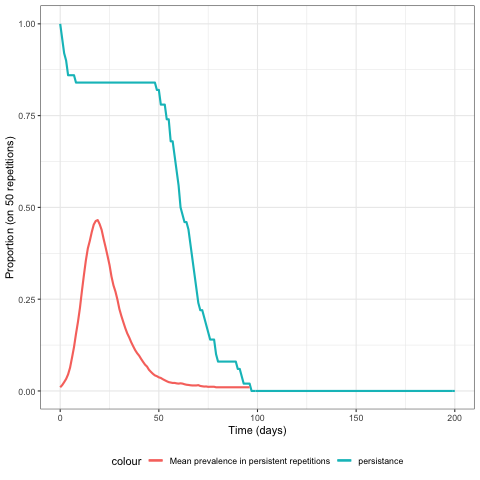

In [6]:
%%R
library(tidyverse)
results <- read.table("exercises/outputs/counts.csv", sep=",", header=TRUE)
## names(results)
## [1] "simu_id"               "S"                     "I"                    
## [4] "R"                     "J"                     "A"                    
## [7] "step"                  "level"                 "agent_id"             
##[10] "percentage_prevalence" "total_herd"           

## compute a persistence curve
NB.RUNS = max(results$simu_id) + 1 

results %>% 
    select(simu_id, step, I, percentage_prevalence) %>% 
    mutate(persists=(I > 0)) %>% 
    group_by(step) %>% 
    summarise(persistance=sum(persists)/NB.RUNS, 
              prevalence=sum(percentage_prevalence)/(100 * sum(persists))) %>%
    ggplot() + 
        geom_line(aes(x=step, y=persistance, colour="persistance"), size=1) + 
        geom_line(aes(x=step, y=prevalence, colour="Mean prevalence in persistent repetitions"), size=1) +
        theme_bw() + xlab("Time (days)") + ylab(paste("Proportion (on", NB.RUNS, "repetitions)")) + theme(legend.position = "bottom")

---

## Exercise 3 — Non-exponential durations

In most models, the durations in each state are assumed to follow exponential distributions. EMULSION allows to specify non-exponential durations in compartmental, IBM and hybrid models by adding a property `duration: value` to a state description. This value has to be defined in the `parameters:` section, either as a constant or as an expression, including the sampling in a statistical distribution.

When individuals (even "virtual" as in compartmental models) enter a state endowed with a `duration` property, they take a value (either constant or drawn in a distribution) and will not be allowed to leave the state before the end of this duration — unless they have a transition marked with an `escape` condition.

### 3.1 Constant duration for juveniles

To illustrate that, first we want to replace the duration in the juvenile state (J), which is by defaut an exponential distribution of average $1/maturation$, by a constant duration `dur_juvenile` equal to $1/maturation$.

- open file [`step3.yaml`](exercises/step3.yaml) and rename the model as `stoch_compart_SIR_JA_dur`
- in the definition of state J, add the following property: `duration: dur_juvenile`, then define parameter `dur_juvenile` accordingly
- then, you have to **change the transition** from J to A by replacing `rate: maturation` by `proba: 1` — this means that any individual that has spent the correct duration in J is allowed to move to A, but not before
- finally, we do not want individuals waiting in the J state to be preserved from mortality! we thus have to allow the transition from J to D to be active during the duration in J: i.e. mark this transition with the property `escape: yes`
- try the model and see how juveniles, still subject to mortality, suddenly move to adults
```
emulsion run --plot step3.yaml --silent
```

In [ ]:
%%bash
cd exercises
emulsion run --plot step3.yaml --silent

Look at the results here: [img/stoch_compart_SIR_JA_dur.html](exercises/img/stoch_compart_SIR_JA_dur.html)

Also, in model diagram, note:
1. the nice **clock** attached to states with a specific **duration** property
2. the **triangle** at the beginning of transitions endowed with an **escape** condition.

```
emulsion diagrams step3.yaml
```

![img/stoch_compart_SIR_JA_dur_age_group_machine.svg](solutions/img/stoch_compart_SIR_JA_dur_age_group_machine.svg)

In [ ]:
%%bash
cd exercises
emulsion diagrams step3.yaml

### 3.2 Adding latency in infection

In some diseases, there is a delay between the infection of suceptible individuals by infectious ones, and the time these newly infected individuals become infectious themselves. We want to add this *latent* or *exposed* state in the model, between S and I. We assume that the latency lasts in average 6 days and is known to follow a narrow gamma distribution as in the graph below:

![Distribution of the duration of latency](img/latency.jpg)

- rename the model as `stoch_compart_SEIR_JA_dur`
- create a new state E in state machine `health_state` with a duration `dur_latency`, adjust the transitions accordingly
- add a parameter `avg_dur_latency` to represent the average duration of latency (e.g. 6 days) 
- define parameter `dur_latency` with the following value: `random_gamma(50, avg_dur_latency/50)`
- add a prototype `infected` and modify initial conditions to start the simulation with latent individuals instead of infectious ones
- modify the `percentage_prevalence` to include the new state
- try the model and see the delay between E and I
```
emulsion run --plot step3.yaml --silent
```

In [ ]:
%%bash
%cd exercises
emulsion run --plot step3.yaml --silent

Look at the results here: [img/stoch_compart_SEIR_JA_dur.html](exercises/img/stoch_compart_SEIR_JA_dur.html)

Also, in model diagram, note:
1. the nice **clock** attached to states with a specific **duration** property
2. the **triangle** at the beginning of transitions endowed with an **escape** condition.

```
emulsion diagrams step3.yaml
```

In [ ]:
%%bash
cd exercises
emulsion diagrams step3.yaml

![img/stoch_compart_SEIR_JA_dur_health_state_machine.svg](solutions/img/stoch_compart_SEIR_JA_dur_health_state_machine.svg)

---

## Exercise 4 — Adding a contact structure

Now, we assume that juveniles and adults are physically separated, which affects the transmission of the pathogen. We have indeed to introduce different transmission rates within and between groups. 

In what follows, we denote by `transAJ` the transmission rate from group A to group J. Thus, group J (resp. A) is experiencing a force of infection defined by:
$$
f_J = \frac{trans_{JJ} \times I_J + trans_{AJ} \times I_A}{N} \qquad f_A = \frac{trans_{AA} \times I_A + trans_{JA} \times I_J}{N}
$$ 

where $I_J$ (resp. $I_A$) denotes the number of infectious individuals in group J (resp. A) and $N$ the total number of individuals (i.e. the variable `total_herd` already in use in the initial force of infection).

### 4.1 Create explicit groupings

EMULSION provides the capability to count the amount of infectious individuals in each group, based on the `groupings:` section already encounterd in hybrid models:
- open file [`step4.yaml`](exercises/step4.yaml) and change the model name into `stoch_compart_SEIR_JA_dur_struct`
- add a section `grouping:` as follows:

        grouping:
          herd:
            infection_by_age: [health_state, age_group]


  This specification makes EMULSION define new variables of the form `total_X_Y` where `X` denote a `health_state` and `Y` an `age_group`, for instance `total_I_J` is the number of infectious juveniles... Also, EMULSION provides boolean variables (0/1) of the form `is_X` to test whether a subpopulation is in state X, e.g. `is_I` returns 1 for infectious subpopulations, 0 otherwise.

- create two new expressions to calculate the prevalence in juveniles and adults respectively, and add them to the `outputs:` section, then test the model

### 4.2 Split the force of infection by age group

- revise the force of infections based on the groupings and the boolean variables:

      force_of_infection:
        desc: 'infection function assuming frequency dependence, depending on age group'
        value: 'is_J * force_of_infection_juveniles + is_A * force_of_infection_adults'
      force_of_infection_juveniles:
        desc: 'force of infection experienced by juveniles'
        value: '(transJJ * total_I_J + transAJ * total_I_A) / total_herd'
      force_of_infection_adults:
        desc: 'force of infection experienced by adults'
        value: '(transAA * total_I_A + transJA * total_I_J) / total_herd'  
            

- don't forget to define the transmissions parameters `transJJ`, `transAA`, `transAJ`, `transJA` 
- test the model with no contact structure, i.e. $$trans_{JJ} = trans_{AA} = trans_{AJ} = trans_{JA} = 0.5$$ (remember option `-p` when running EMULSION!), observe the prevalence in each group
- test the model with the following contact structure: $$trans_{JJ} = 0.1, \quad trans_{AA} = 1,\quad trans_{AJ} = trans_{JA} = 0.05$$ and observe the prevalence in each group


---

## Exercise 5 — Transformation into an Individual-Based Model (IBM)

Compartmental models are simple and able to cope with large amounts of individuals, but those individuals are not simulated explicitly: the total population is split into sub-populations associated with quantities. IBM provide a finer-grained approach where individuals features can be modelled explicitly.

EMULSION provides facilities for transforming compartmental models into IBM.
- open file [`step5.yaml`](exercises/step5.yaml)
- change the model name into `stoch_IBM_SEIR_JA_dur`
- in the `levels:` section, change the aggregation type from `compartment` to `IBM`
- just try (quite easy, isn't it?)
```
emulsion run --plot step5.yaml --silent
```


In [ ]:
%%bash
cd exercises
emulsion run --plot step5.yaml --silent

Note the execution time — slow, isn’t it ?...

---

## Exercise 6 — Hybrid models

Programming issues aside, the major drawback of IBM is often execution time. EMULSION provides an automatic way of grouping individuals to reduce computation time. Such *hybrid models* are specified through keyword `aggregation_type: 'hybrid'` in the levels section. They use all IBM features, except for groupings and processes.

- open [step6.yaml](exercises/step6.yaml) and change the model name into `stoch_hybrid_SEIR_JA_dur`
- in the `levels:` section, change the aggregation type from `compartment` to `hybrid`
- and modify the `processes:` section as follows:

        processes:
          animals:            
            - health_state: infection_by_age
            - age_group: infection_by_age                    

- finally test the model:
````
emulsion run --plot step6.yaml --silent
````


In [ ]:
%%bash
cd exercises
emulsion run --plot step6.yaml --silent

and check the results: [img/stoch_hybrid_SEIR_JA_dur_struct.html](exercises/img/stoch_hybrid_SEIR_JA_dur_struct.html)

Note the execution time — much better, isn’t it ?

---

## Exercise 7 — Variable individual shedding

We now assume that pathogen shedding depends on:
- individuals, to account for differences in immune response to the pathogen (e.g. low shedders vs. high shedders)
- the time elapsed since infection, to account for the progressive clearing of the pathogen

Each infectious individual now has a variable shedding rate defined as follows:
- we assume that juveniles are low shedders whereas adults are high shedders
- at infection, each individual sets a maximum shedding rate $\beta_i^{\max}$ which is sampled in a gamma distribution:  
  - low shedders: ``random_gamma(50, 1.0/50)``
  - high shedders: ``random_gamma(100, 2.0/100)``
- at time $T_i$ after infection, individuals have a shedding rate: $$\beta_i = \beta_i^{\max} \times e^{-2 T_i * recovery}$$

To do so, we rely upon several EMULSION features regarding individual variables.

### 7.1. Add individual and aggregate variables:

Open [step7.yaml](exercises/step7.yaml) and change the model name into `stoch_hybrid_SEIR_JA_dur_var`


1. Add a new section ``statevar:`` to declare and describe the new variables:

       statevars:
         beta_i_max:
           desc: 'maximum shedding rate'
         beta_i:
           desc: 'current shedding rate'

2. Add a prototype as follows:
    
       - default_animal:
           beta_i: 0
           beta_i_max: 0
        
3. Add a default prototype in the ``levels:`` section:

        levels:
          ...
          animals:
            desc: 'level of individuals (not simulated in compartment-based models)'
            default_prototype: default_animal

This ensures that all animals initialize variables $\beta_i^{\max}$ and $\beta_i$ properly.

4. Define a variable ``total_beta`` at the level of the herd as the sum of individual variables ``beta_i``:

       levels:
         herd:
           ...
           aggregate_vars:
             - name: 'total_beta'
               collect: 'beta_i'
               operator: 'sum'
         ...

5. Revise the force of infection

``total_beta`` can be seen as the total amount of pathogen **shed in the environment** at herd scale. 

To simplify, we will not use the conctact structure between adults and juveniles and just assume that the force of infection is determined by this environmental shedding:

    force_of_infection:
      desc: 'infection function assuming frequency dependence'
      value: 'total_beta / total_herd'


You will be able to visualize the evolution of ``total_beta`` by adding it in the ``outputs:`` section. Yet, at this stage no infection occurs, because the individual variables are not set properly during infectious state!


### 7.2 Update shedding

1. Define actions when entering/staying/leaving the infectious state

These individual variables must be updated when individuals enter the I state, while they are infectious, and when they recover. This can be done using built-in actions to modify the variables in state I:

      - I:
          name: 'Infectious'
          ...
          on_enter:
            - set_var: 'beta_i_max'
              value: 'beta_max'
            - set_var: 'beta_i'
              value: 'beta_i_max'
          on_stay:
            - set_var: 'beta_i'
              value: 'beta'
          on_exit:
            - set_var: 'beta_i'
              value: 0

Actions are executed in sequence when the corresponding event (enter, stay, exit) is triggered.

2. Define expressions for updating shedding

The final step consists in defining the convenient expressions for ``beta_max`` and ``beta`` in the ``parameters:`` section.

- for ``beta_max``, remember that the distribution to use depends on the age group!
- for ``beta``, which is a time-dependent expression, you can use the built-in variable ``duration_in_health_state`` which provides the time elapsed since entering the current state of state machine ``health_state`` (hence, the duration in infectious state for infectious individuals)

Generate the state machine diagram and note the lozenges which mark the presence of actions when entering I state, staying in I, and exiting I.

In [12]:
%%bash
cd exercises
emulsion diagrams step7.yaml

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_health_state_machine.svg
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_age_group_machine.svg


![img/stoch_hybrid_SEIR_JA_dur_var_health_state_machine.svg](solutions/img/stoch_hybrid_SEIR_JA_dur_var_health_state_machine.svg)

--- 

## Exercise 8 — Test-and-cull

We assume now that the disease can be detected through a test, with a given sensitivity and specificity. The **sensitivity** is the capability of the test to identify all infected individuals (i.e. the probability of being detected if infected, $Se = p(D|I)$), whereas the **specificity** is the capability of the test to identify only infected individuals (i.e. the probability of not being detected when not infected, $Sp = p(\neg D|\neg I)$). Hence, the probability of being detected is:
$$p_{detection} = Se \times p(I) + (1 - Sp) \times (1 - p(I))$$ where $p(I)$ denotes the probability that the tested individual is infected.



### 8.1 Setup individual tests

Open [step8.yaml](exercises/step8.yaml) and change the model name into `stoch_hybrid_SEIR_JA_dur_var_test`

1. Add a new state machine to represent the test protocol
- animals are ``Untested`` by default. Let's assume that individuals are not tested until there are at least 50(``threshold_untested``) untested individuals.
- ``Negative`` animals had a test with negative results. This test result is considered valid for 12 weeks, then they return to ``Untested``
- ``Suspicious`` animals were tested positive (previously untested): in that case, a second test is scheduled after ``delay_before_confirmation`` (1 week), which can lead either to ``Negative`` or to ``Confirmed``
- ``Confirmed`` animals were tested positive twice in consecutive tests. They will be culled after ``delay_before_culling`` (5 days)
- ``Culled`` animals are removed from the herd permanently.

2. Define the associated parameters, and the expression ``proba_positive_test`` for the probability that a test is positive, depending on the actual health state of the individual. 

Here we will take a test with a ``sensitivity`` of 0.9 and a ``specificity`` of 0.7 (should give a lot of false positives!)

3. Do not forget to update the ``grouping:`` and ``processes:`` sections!

4. Update the default prototype 

5. Generate the model diagrams, then test your model

In [16]:
%%bash
cd exercises
emulsion diagrams step8.yaml

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_test_test_status_machine.svg
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_test_health_state_machine.svg
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_test_age_group_machine.svg


![img/stoch_hybrid_SEIR_JA_dur_var_test_test_status_machine.svg](solutions/img/stoch_hybrid_SEIR_JA_dur_var_test_test_status_machine.svg)

### 8.3 Improve tests 

As you can see, this test-and-cull protocol is not very efficient...

Try to improve protocol efficacy:
- what would happen with more sensitive/specific tests ?
- what is the impact of the delays to re-test or cull confirmed animals ?
- how would you represent tests that can detect early infection (i.e. exposed state as well as infectious?)


--- 

## Exercise 9 — Quarantine

In the previous model, suspicious and confirmed animals are still possibly infecting others. Quarantine is a way to isolate detected animals so that they are not a threat during a given period.

Open [step9.yaml](exercises/step9.yaml) and change the model name into  ``stoch_hybrid_SEIR_JA_dur_var_test_quar``

1. Add a new state machine ``isolation`` with the following states:
  - ``InGroup`` (default) for animals with the rest of the herd
  - ``Isolated`` where animals either suspicious or confirmed move for a duration ``dur_quarantine`` of 40 days (then back to ``InGroup``)
  
2. Update the default prototype accordingly

3. Rewrite grouping and processes as follows:


       grouping:
         herd:
           infection_by_age: [health_state, age_group]
           infection_and_test: [test_status, health_state, isolation]

       processes:
         animals:
           - health_state: infection_and_test
           - age_group: infection_by_age
           - test_status: infection_and_test
           - isolation: infection_and_test
   
4. Update the force of infection 

You already know that you get variables of the form ``total_I`` based on the names of states defined in state machines... This also applies to **aggregate variables**, especially ``total_beta`` which was defined at herd scale. Hence, you get variables of the form ``total_beta_X`` where X can be any valid state name.

Assuming that isolated individuals do not contribute to infection (including between themselves), update the expression of the force of infection.
   

5. Have a look at the state machine diagrams and run your model with the best control strategy found in the test-and-cull measure. 

Can culling be replaced with quarantine?


In [19]:
%%bash
cd exercises
emulsion diagrams step9.yaml

/Users/picault/git/emulsion-training/exercises
Simulation level:herd
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_test_quar_test_status_machine.svg
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_test_quar_isolation_machine.svg
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_test_quar_health_state_machine.svg
Generated state machine diagram img/stoch_hybrid_SEIR_JA_dur_var_test_quar_age_group_machine.svg


![img/stoch_hybrid_SEIR_JA_dur_var_test_quar_isolation_machine.svg](solutions/img/stoch_hybrid_SEIR_JA_dur_var_test_quar_isolation_machine.svg)

---

## Exercise 10 — Changing scale: metapopulation

EMULSION models can also work at the metapopulation scale. Metapopulations are a collection of 
populations with a contact structure, to account e.g. for indirect transmission or individual mobility. We are going to transpose the current model to the metapopulation level.

### 10.1 Add the metapopulation level

Open [step10.yaml](exercises/step10.yaml) and change the model name into  ``stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop``

1. In the ``levels:`` section, add a level named "metapop" with aggregation type ``metapopulation`` 
2. Move ``initial_prevalence`` from the ``parameters:`` section to ``statevars::`` (remove the ``value`` and keep only the ``desc`` part)
3. Create two prototypes at herd level: ``healthy_herd`` and ``infected_herd`` with ``initial_prevalence`` set respectively to 0 and 0.1
4. Add a parameter ``nb_herds`` with a small value (4-10) 
5. Add initial conditions for the metapop level, composed of 1 infected herd and ``nb_herds - 1`` 

... "et  voilà !" — You should already be able to test the model at the metapopulation scale!

In [23]:
%%bash
cd exercises
emulsion run --plot step10.yaml --silent

/Users/picault/git/emulsion-training/exercises
Simulation level:metapop
Simulation finished in 121.15 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop.html


100%|██████████| 10/10


Look at the [results](exercises/img/stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop.html):

![img/metapop.png](img/metapop.png)


### 10.2 Transmission between populations

At this stage, indeed, the pathogen spreads within the infected population as expected but not to other populations. To do so, we now assume that the force of infection experienced by each population is composed of:
- the previous force of infection (within-population transmission)
- a force of infection resulting from pathogen spread by other populations

1. In the ``levels:`` section, add an aggregate variable ``metapop_total_beta`` to compute the total amount of pathogen in the metapopulation.
2. Define a parameter ``trans_metapop = 0.002`` which represents the proportion of total amount of pathogen shed in the metapopulation which contributes to transmission in each herd, and add a term in the force of infection to account for this between-herd transmission
3. Test your model and see the disease spread within the metapopultion as the prevalence in the initial infected herd grows...


### 10.3 Processes at population scale

In an EMULSION model, state machines can be used to implement processes not only at the individual scale, but also at the level of the population.

1. Write a state machine ``herd_status`` which corresponds to the following diagram:

![img/stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop_herd_status_machine.svg](solutions/img/stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop_herd_status_machine.svg)

2. Add the corresponding expressions (``any_case``,  ``any_confirmed``) and durations (``dur_alert``, e.g. 14 days, and ``dur_infected``, e.g. 28 days) in the ``parameter:`` section.

2. Modify the ``processes:`` section as follows:

       processes:
         herd:
           - herd_status
         animals:
           ... (unchanged)
           
4. Do not forget that the initial ``herd_status`` of each herd must be initialized! You can either update herd prototypes, or define a default prototype associated with level herd.

5. You can track the evolution of the status of each herd by adding variables ``is_Alert`` or ``is_Infected`` to the outputs.
           

### 10.4 Conditional simulation interruption

Suppose that your objective is to study how long it takes for the metapopulation to be fully infected (and detected as such): in that case, maybe running each simulation for the whole period is a waste of time.

The ``time_info`` section provides a way to interrupt the simulation before the time limit (100 time steps by default, overriden by ``total_duration`` or command-line option ``-t``). 

1. Create an aggregate variable ``metapop_nb_infected`` at metapop scale to compute the number of herds in the ``Infected`` state.

2. Write an expression ``all_populations_infected`` in the ``parameters:`` section to determine whether or not all populations are in this status.

3. In the ``time_info:`` section, just add:

       time_info:
         ...
         stop_condition: 'all_populations_infected'



---

## Exercise 11 — Connecting to data

Model realism can be enhanced through data in various ways. Though data formats and content can be very diverse, EMULSION provides several methods to connect models to data.

### 11.1 Parameterizing initial conditions from data

All populations in the metapop were created with similar prototypes, except for the initial prevalence. To account for a stronger diversity in herd profiles, defining all prototypes by hand would be quite tedious in large populations. Hence we are going to demonstrate the principle of using data-based prototypes in EMULSION. 

Open [step11.yaml](exercises/step11.yaml) and change the model name into  ``stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop_data``

1. Open file [data/herds.csv](exercises/data/herds.csv) and look at the column names.
2. Move the matching parameters to the ``state_vars:`` section (keeping only the description)
3. Add the following herd prototype:
       
       herd:
         - data_based_herd:
             desc: 'herd collection with data-driven initial conditions'
             file: 'herds.csv'
             select: 'ordered_cycle'
             herd_status: DiseaseFree

4. Modify the initial conditions as follows:

       initial_conditions:
         metapop:
           - prototype: data_based_herd
             amount: 'nb_herds'

When a prototype based on a data file is used, e.g. in initial conditions, the prototype actually used to determine the initial value of variables is chosen among the lines of the CSV file, according to the method indicated in ``select`` (and possible additional constraints, see EMULSION documentation). Here for example, lines are taken in order (and cycle to the first line after the last one).

5. Test the model on 200 days (``-t 200``) to better see the differences between populations (especially how the initial herd size adjusts to the carrying capacity). Use a high specifity (or remove the stop condition) to avoid halting simulation too early.








### 11.2 Time-dependent data-driven parameters

### 11.3 Data-driven mobility: coupling Python add-ons with EMULSION

---

## Exercise 12 — A treatment, at last! —  Late modifications of within-herd model assumptions


---

# A case study: 

In this part, we are going to re-implement with EMULSION a published model which covers additional modelling issues, such as multi-species interactions and control.

## A. Re-implement the model 

1. Read the original paper: [Massad et al. 2001](https://doi.org/10.1006/tpbi.2000.1494) (or the copy here) — well... at least, read section 3!

> E. Massad, F. A. B. Coutinho, M. N. Burattini, P. C. Sallum, and L. F. Lopez (2001), A Mixed Ectopara- site–Microparasite Model for Bat-Transmitted Rabies, Theoretical Population Biology 60, 265–279. DOI: 10.1006/tpbi.2000.1494

2. What do you think of the flow diagram?
3. Try to rewrite the diagram in EMULSION style (not only from the original flow diagram but also from the text and the equations). You can start without any form of disease control.
4. Choose a modelling paradigm (and explain why!)
5. Start writing you EMULSION implementation and test it!
6. Maybe there are weird values in parameters. Propose appropriate corrections.
7. Write outputs to visualize the prevalence in bats and cattle respectively

## B. Introduce control methods

1. Propose and implement an output ``disease_impact`` that can summarize the severity of the disease. It will be used to assess the efficiency of disease control.
2. Two control methods are proposed in the paper (§5.4)
  - cattle vaccination
  - bat poisoning 
  
  Propose mechanisms to implement them in EMULSION and test each of them.
 

## C. Explore the model and parameter states

We now want to assess the impact of control methods and of control level on ``disease_impact``. To do so, define a set of scenarios as a CSV file as follows (with **tabulations**, not commas, as field separator):
- the first column (names ``scenario_id``) contains the name of the scenario (and will serve as the name of a directory where the results will be put)
- other columns, names after each parameter considered for scenario definition, contain the values that those parameters take in each scenario (hence one line corresponds to a complete parameter configuration for one scenario).

Example: a CSV file called ``control.csv``


> TODO

1. Run the scenarios (with ``./scripts/test_scenarios.sh``)
2. Gather results into a single CSV file (with ``Rscript scripts/gather_outputs.R``)
3. Finally view how simulation outcomes change depending on control parameters (``Rscript scripts/analyse_results.R``)



In [ ]:
## 